In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.stats import poisson
from scipy.optimize import curve_fit

In [11]:
file = "./data/pulse_overweekend.txt"
data = pd.read_csv(file, delimiter="\t", skiprows=3, usecols=range(6))
data

,Ch0_time1 (s),Ch0_amp1 (V),Ch0_width1 (s),Ch0_time2 (s),Ch0_amp2 (V),Ch0_width2 (s)
0,0.000005,0.454184,6.685328e-08,0.000015,0.130304,6.106387e-08
1,0.000005,0.291223,7.461138e-08,0.000007,0.018895,5.280583e-08
2,0.000005,0.299415,6.291269e-08,0.000007,0.026747,5.452187e-08
3,0.000005,0.277387,6.500570e-08,0.000007,0.020298,5.338681e-08
4,0.000005,0.603862,8.854883e-08,0.000007,0.026414,5.381414e-08
...,...,...,...,...,...,...
146305,0.000005,0.306034,6.306087e-08,0.000011,0.024099,5.461781e-08
146306,0.000005,0.329468,6.768767e-08,0.000007,0.019183,5.572357e-08
146307,0.000005,0.245961,6.543811e-08,0.000040,0.046188,5.925590e-08
146308,0.000005,0.349681,6.497903e-08,0.000007,0.024822,5.340026e-08


In [ ]:
lifetime = data["Ch0_time2 (s)"] - data["Ch0_time1 (s)"]

hist, bin_edges = np.histogram(lifetime, bins=50)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
hist = hist[0:]
bin_centers = bin_centers[0:]

def exp_decay(t, A, tau, C):
    return A * np.exp(-t / tau) + C

p0 = [np.max(hist), np.mean(lifetime), 0]
params, cov = curve_fit(exp_decay, bin_centers, hist, p0=p0)
A_fit, tau_fit, C_fit = params

A_err, tau_err, C_err = np.sqrt(np.diag(cov))
print(f"Fitted mean lifetime tau = {tau_fit:.3e} ± {tau_err:.3e} s")

Fitted mean lifetime tau = 4.878e-07 ± 1.242e-08 s


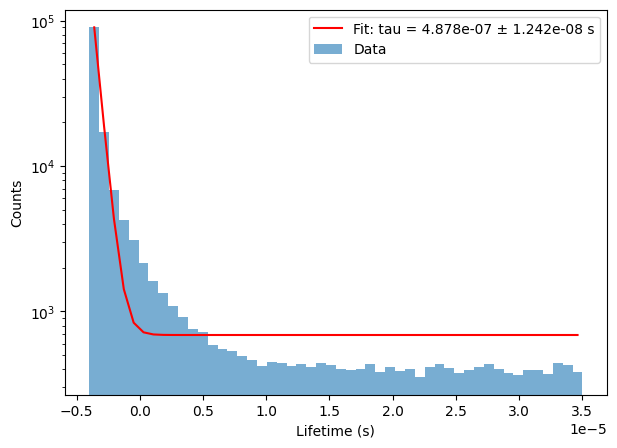

In [79]:
plt.figure(figsize=(7,5))
plt.bar(bin_centers, hist, width=(bin_edges[1]-bin_edges[0]), alpha=0.6, label='Data')
plt.plot(bin_centers, exp_decay(bin_centers, A_fit, tau_fit, C_fit), 'r-', label=f'Fit: tau = {tau_fit:.3e} ± {tau_err:.3e} s')
plt.yscale("log")
plt.xlabel("Lifetime (s)")
plt.ylabel("Counts")
plt.legend()
plt.show()

In [ ]:
#| echo: false
#| output: false
filename = "eda.ipynb"

!html2pdf "$filename"